# Sklearn
Основа материала взята из репозитория https://github.com/emeli-dral/sklearn_intro

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

## Общий алгоритм решения задачи машинного обучения:

0. Формулируем задачу и определяем целевые метрики
1. Готовим размеченные данные
2. Разбиваем данные на обучающую и тестовую выборки
3. Выбираем подходящий алгоритм и обучаем модель
4. Оцениваем качество модели

**Важно!** 
То, какую модель выберем, часто зависит от того, какая целевая метрика!

In [ ]:
from sklearn import model_selection, datasets, linear_model, metrics

import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
sns.set();

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
%pylab inline

In [ ]:
# вспомогательная функция для отрисовки картинок
# понимать, что в ней написано, совсем необязательно
# это не уменьшит понимание лекции

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

## Будем решать задачу бинарной классификации на синтетически сгенерированных данных

### 1. Подготовка данных

In [ ]:
# генерируем 2 облака с заданным разбросом
blobs = datasets.make_blobs(centers=2, cluster_std=3)

In [ ]:
blobs[0].shape, blobs[1].shape

((100, 2), (100,))

In [ ]:
blobs

(array([[ -2.88776982,   1.99404627],
        [ -7.61888272,   0.28090992],
        [  4.35086515,   6.87109294],
        [ -4.85820269,   1.64919882],
        [ -2.85065063,   1.40703349],
        [ -3.03295876,   0.67099565],
        [ -0.16160383,   5.90292256],
        [ -1.01243267,  -1.42778252],
        [  0.05747027,   7.45547955],
        [ -3.61221119,  -1.93675514],
        [  2.83639165,   0.23972427],
        [ -2.72426088,  -0.86823305],
        [ -3.38632987,   4.29357661],
        [ -3.33751753,  -5.15664751],
        [ -3.1419259 ,  -4.23582545],
        [ -1.59253713,  -1.80428446],
        [ -0.30162569,   5.01945599],
        [ -0.39435419,   9.67954614],
        [ -1.62213864,  -1.88026014],
        [ -0.15366395,   5.18184694],
        [ -3.13224287,  -3.70727937],
        [ -4.3956181 ,  -5.57006473],
        [ -5.11138369,   0.79498184],
        [ -3.99681865,   3.35489695],
        [ -2.29011404,  -0.64552938],
        [  0.76822742,   4.97260967],
        [ -3

In [ ]:
df = pd.DataFrame(blobs[0], columns=['feature_1', 'feature_2'])

In [ ]:
df.shape

(100, 2)

In [ ]:
df.head()

,feature_1,feature_2
0,-2.887770,1.994046
1,-7.618883,0.280910
2,4.350865,6.871093
3,-4.858203,1.649199
4,-2.850651,1.407033


In [ ]:
blobs[1]

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])

In [ ]:
df['target'] = blobs[1]

In [ ]:
df.head()

,feature_1,feature_2,target
0,-2.887770,1.994046,0
1,-7.618883,0.280910,1
2,4.350865,6.871093,1
3,-4.858203,1.649199,1
4,-2.850651,1.407033,0


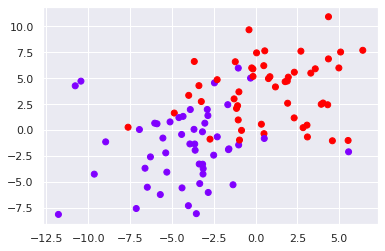

In [ ]:
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

### 2. Разбиение данных на обучающую и тестовую выборки

Разбейте данные на ```train``` и ```test``` с помощью функции ```model_selection.train_test_split()```.
В обучающую выборку поместите 70% данных

In [ ]:
?model_selection.train_test_split

In [ ]:
X = df[['feature_1', 'feature_2']]
y = df['target']

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape

(70, 2)

In [ ]:
X_test.shape

(30, 2)

### Линейная классификация

#### LogisticRegression

In [ ]:
# создание объекта-классификатора
log_regressor = linear_model.LogisticRegression()

### 3. Обучение модели

Вызовите у классификатора метод ```.fit()```, передав в метод обучающие данные

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
log_regressor = log_regressor.fit(X_train, y_train)

Применение обученного классификатора

Вызовите у классификатора метод ```.predict()```, передав в метод тестовые данные

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_predictions = log_regressor.predict(X_test)

In [ ]:
# распечатайте предсказания алгоритма (logreg_predictions)
logreg_predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
# распечатайте истинные метки объектов алгоритма (y_test)
y_test.values

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
logreg_predictions == y_test.values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
acc = np.mean(logreg_predictions == y_test.values)
acc

0.9333333333333333

# precision, accuracy, recall, f1

Логистическая регрессия умеет оценивать вероятность принадлежности объекта к классам классификации. 
Вызовите у классификатора метод ```.predict_proba()```, передав в метод тестовые данные

In [ ]:
# proba = probabilities = вероятности

# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_proba_predictions = log_regressor.predict_proba(X_test)

In [ ]:
log_regressor.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1])

In [ ]:
2.13218851e-04 + 9.99786781e-01

In [ ]:
# распечатайте предсказанные вероятности принадлежности объектов к разным классам
logreg_proba_predictions

array([[0.8858013 , 0.1141987 ],
       [0.99469951, 0.00530049],
       [0.95054278, 0.04945722],
       [0.90912629, 0.09087371],
       [0.38841935, 0.61158065],
       [0.58604071, 0.41395929],
       [0.56564462, 0.43435538],
       [0.81292538, 0.18707462],
       [0.06388428, 0.93611572],
       [0.66739549, 0.33260451],
       [0.06489344, 0.93510656],
       [0.00209407, 0.99790593],
       [0.70192856, 0.29807144],
       [0.05038147, 0.94961853],
       [0.30614298, 0.69385702],
       [0.0347261 , 0.9652739 ],
       [0.84959416, 0.15040584],
       [0.25056207, 0.74943793],
       [0.07249645, 0.92750355],
       [0.23794445, 0.76205555],
       [0.74836314, 0.25163686],
       [0.99343118, 0.00656882],
       [0.88221256, 0.11778744],
       [0.2361853 , 0.7638147 ],
       [0.00363831, 0.99636169],
       [0.17715622, 0.82284378],
       [0.1805088 , 0.8194912 ],
       [0.85062905, 0.14937095],
       [0.01382975, 0.98617025],
       [0.057202  , 0.942798  ]])

### Код для генерации данных

In [ ]:
# same_exmpl
log_reg_1 = linear_model.LogisticRegression(penalty='none', max_iter=5, random_state=1000).fit(X_train, y_train)
log_reg_2 = linear_model.LogisticRegression(penalty='l2', max_iter=50, random_state=42).fit(X_train, y_train)

y_pred_1 = log_reg_1.predict(X_test)
y_pred_2 = log_reg_2.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_pred_1)

0.8333333333333334

In [ ]:
y_pred_11 = np.where(y_pred_1 == 0, 1, 0)
y_pred_11
metrics.accuracy_score(y_test, y_pred_11)

0.16666666666666666

In [ ]:
metrics.accuracy_score(y_test, y_pred_2)

0.8666666666666667

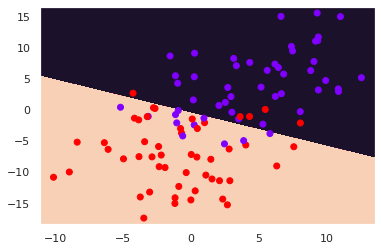

In [ ]:
# log_reg_1
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_reg_1, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

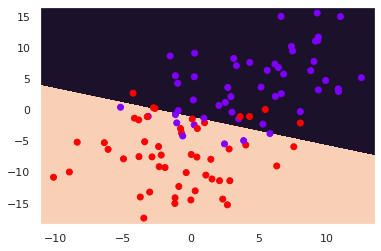

In [ ]:
# log_reg_2
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_reg_2, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

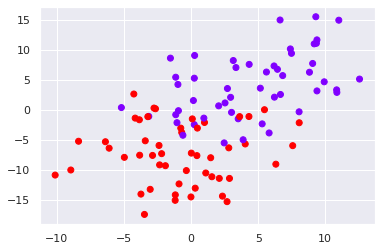

In [ ]:
# генерируем 2 облака с заданным разбросом
# blobs = datasets.make_blobs(centers=2, cluster_std=2)
blobs = datasets.make_blobs(centers=2, cluster_std=5)
df = pd.DataFrame(blobs[0], columns=['feature_1', 'feature_2'])
df['target'] = blobs[1]
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

In [ ]:
blobs_1 = blobs

In [ ]:
X = df[['feature_1', 'feature_2']]
y = df['target']
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

log_regressor = linear_model.LogisticRegression().fit(X_train, y_train)

logreg_predictions = log_regressor.predict(X_test)

metrics.accuracy_score(y_test, logreg_predictions)

0.8666666666666667

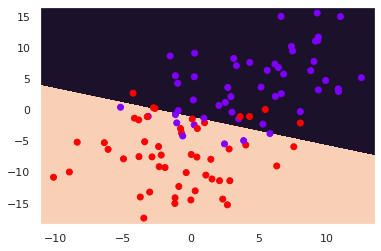

In [ ]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

### 4. Оценка качества модели

Посчитайте ```accuracy score``` модели на тестовых данных с помощью функции ```metrics.accuracy_score()```, передав в функцию настоящие и предсказанные метки

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
metrics.accuracy_score(y_test, logreg_predictions)

0.8666666666666667

### Как затем использовать эту модель, обученную в jupyter ноутбуке?

$$
f(x) = sigmoid(w_1 * x_1 + w_2 * x_2)
$$

$$
f(x) = sigmoid(w_0 + w_1 * x_1 + w_2 * x_2)
$$
$w_0, w_1$ и $w_2$ находим с помощью обучения модели

In [ ]:
log_regressor1 = linear_model.LogisticRegression()
log_regressor1.intercept_

AttributeError: ignored

In [ ]:
print('Intercept', log_regressor.intercept_) # w_o
print('Coefficient', log_regressor.coef_) # w_1 and w_2

Intercept [-0.48801162]
Coefficient [[-0.19279429 -0.42147923]]


## Прекрасная наглядная визуализация логистической регрессии: https://florianhartl.com/logistic-regression-geometric-intuition.html

####  Нарисуем границу принятия решения нашим классификатором

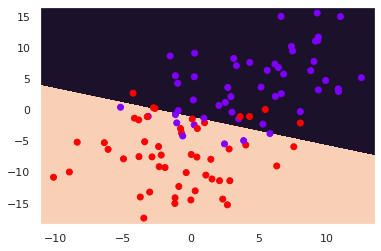

In [ ]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

### Оценка качества модели по кросс-валидации

#### cross_val_score

Посчитайте качество модели на кросс-валидации по 10 фолдам (параметр ```cv```) c метрикой ```accuracy``` (параметр ```scoring```) с помощью функции ```model_selection.cross_val_score```


In [ ]:
X_train.shape

(70, 2)

In [ ]:
logistic_regressor = linear_model.LogisticRegression()
logreg_scoring = model_selection.cross_val_score(logistic_regressor, X_train, y_train, cv=10)

In [ ]:
xx, yy = make_meshgrid(blobs[0][:, 0], blobs[0][:, 1])
fig, sub = plt.subplots()
plot_contours(sub, log_regressor, xx, yy)
plt.scatter(x=df['feature_1'], y=df['feature_2'], c=df['target'], cmap='rainbow')

In [ ]:
# -- НАПИШИТЕ ВАШ КОД ЗДЕСЬ --
logreg_scoring.mean()

0.7857142857142857

In [ ]:
logreg_scoring

array([0.85714286, 0.85714286, 0.71428571, 1.        , 0.85714286,
       0.85714286, 0.71428571, 0.71428571, 0.71428571, 0.57142857])

In [ ]:
logreg_scoring.mean()

In [ ]:
print('Log mean:{}, max:{}, min:{}, std:{}'.format(logreg_scoring.mean(),
                                                   logreg_scoring.max(), 
                                                   logreg_scoring.min(),
                                                   logreg_scoring.std()))

Log mean:0.7857142857142857, max:1.0, min:0.5714285714285714, std:0.11517511068997927


In [ ]:
6 / 7